In [1]:
#importing libraries
import tweepy
from textblob import TextBlob
import matplotlib.pyplot as plt
def percentage(part,whole):
        return 100* float(part)/float(whole)

In [7]:
#consumer_keys='aklgcFQaqCgYY1pWtzUixNSIV'
#consumer_secrets='tt5NSjnTrJtbVp0KQ88gvLFGZkQxufc721NrJFkbzytDd9pjcY'
#access_token='866913642251341824-0r8tdvfw1CBnZhRgQcNTyPfIhz536N4'
#access_token_secret='ll22Ji27mZVbjb01VGBuDDUiMkl7rEHuQqTVCriUrjPJo'
consumer_key = 'ATfKfmlU88EffYQzIF8SQhiYX'
consumer_secret = 'dy8ao96WUqEFjEGi7dnIEiAT2Vq6EDDkXPOv0k50DcSr9dnwsz'
access_token = '180739880-ncdWLjX4vDYfaCh1Foj2dltv6TNOPa31Nxb4zvXy'
access_token_secret = '3vevh5nD8Z6IXlHn2XcrD7pnxtMVTZRbwu49rPLVRNW1n'

In [8]:
auth =tweepy.OAuthHandler(consumer_key, consumer_secret) #authorization
auth.set_access_token(access_token,access_token_secret)

In [9]:
api=tweepy.API(auth) #APIcalling

In [10]:
searchTerm= input("Enter the tag to be searched")
NoOfTerms= int(input("Enter the no of tweets to be searched"))

tweets=tweepy.Cursor(api.search, q=searchTerm).items(NoOfTerms)

positive=0
negative=0
neutral=0
polarity=0

Enter the tag to be searched#sudan
Enter the no of tweets to be searched25


In [11]:
for tweet in tweets:
    print(tweet.text)
    
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    if (analysis.sentiment.polarity == 0):
        neutral +=1
    elif(analysis.sentiment.polarity < 0.00):
        negative +=1
    elif(analysis.sentiment.polarity > 0.00):
        positive +=1    

RT @RepDanKildee: Good news! The @HouseForeign Committee just passed my bipartisan #Sudan resolution calling for an end to violence, respec…
RT @RepSpanberger: Today, @houseforeign marked up &amp; passed a resolution condemning the attacks on peaceful protesters in #Sudan. I’m proud…
@weirdfan1 The Transitional Legislative Assembly and the Transitional Council of Ministers will be required to do a… https://t.co/1EPsVxK1MF
RT @HouseForeign: The world cannot turn a blind eye to the #SudanMassacre. Today @HouseForeign unanimously passed a resolution condemning t…
@mccullough1888 @historylvrsclub Even if it was *not* an inside job, why did #GeorgeBushJr wait for three whole yea… https://t.co/Ia587JSpXb
Beehive Tombs, Old Dongola, Sudan.
.
.
.
#Checkoutafrica #Africa #Sudan #ancientafrica 📷 @eric_lafforgue https://t.co/sUbOPG8Kl8
@dalliasd @brideOfFacetasm This #internet_blackout_in_sudan will also affect #Sudan's economy. #SudanUprising
RT @DaliahVK: #SudanUprising #sudan #berlin https://t

In [12]:
positive=percentage(positive, NoOfTerms)
negative=percentage(negative, NoOfTerms)
neutral=percentage(neutral, NoOfTerms)

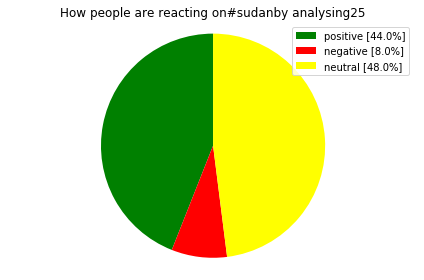

In [15]:
labels=['positive ['+str(positive)+'%]','negative ['+str(negative)+'%]','neutral ['+str(neutral)+'%]']

sizes=[positive,negative,neutral]
colors=['green','red','yellow']
patches, text=plt.pie(sizes,colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")
plt.title('How people are reacting on'+searchTerm+'by analysing'+str(NoOfTerms))
plt.axis('equal')
plt.tight_layout()
plt.show()